<a href="https://colab.research.google.com/github/Kavin-Prakash-T/Blog/blob/main/Fire_and_Gas_Leak_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"SafeHome – Fire and Gas Leak Detection Model
Domain: Machine Learning – IoT Sensor Analytics
SDGs: SDG 9 – Industry, Innovation, and Infrastructure, SDG 11 – Sustainable Cities and Communities

Problem Statement:
Develop a machine learning model that detects potential fire or gas leak hazards using sensor data such as CO₂, temperature, and methane concentration readings.

Dataset:
Gas Sensor Dataset (Kaggle) or simulated IoT sensor data

Expected Output:
An ML model that classifies environment status as Safe, Warning, or Danger."

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv("/content/smoke_detection_iot.csv")

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
df.shape

(45136, 16)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
UTC,0
Temperature[C],0
Humidity[%],0
TVOC[ppb],0
eCO2[ppm],0
Raw H2,0
Raw Ethanol,0
Pressure[hPa],0
PM1.0,0


In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
UTC,int64
Temperature[C],float64
Humidity[%],float64
TVOC[ppb],int64
eCO2[ppm],int64
Raw H2,int64
Raw Ethanol,int64
Pressure[hPa],float64
PM1.0,float64


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'UTC'])

In [ ]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
df.isnull().sum()

,0
Temperature[C],0
Humidity[%],0
TVOC[ppb],0
eCO2[ppm],0
Raw H2,0
Raw Ethanol,0
Pressure[hPa],0
PM1.0,0
PM2.5,0
NC0.5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45135 entries, 0 to 45134
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  45135 non-null  float64
 1   Humidity[%]     45135 non-null  float64
 2   TVOC[ppb]       45135 non-null  int64  
 3   eCO2[ppm]       45135 non-null  int64  
 4   Raw H2          45135 non-null  int64  
 5   Raw Ethanol     45135 non-null  int64  
 6   Pressure[hPa]   45135 non-null  float64
 7   PM1.0           45135 non-null  float64
 8   PM2.5           45135 non-null  float64
 9   NC0.5           45135 non-null  float64
 10  NC1.0           45135 non-null  float64
 11  NC2.5           45135 non-null  float64
 12  CNT             45135 non-null  float64
 13  Fire Alarm      45135 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 5.2 MB


In [ ]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.000000,45135.00000,45135.000000,45135.000000
mean,13.441743,51.603851,724.332159,452.609992,12976.085854,19681.667265,939.165276,1.572541,1.637043,10.815485,1.691620,0.04126,11413.700919,0.859178
std,13.062886,3.308939,505.996291,98.008774,159.703395,295.207868,0.398533,0.759806,0.786694,5.242870,0.812629,0.05823,6735.647220,0.347842
min,-22.010000,44.690000,0.000000,400.000000,12306.000000,18520.000000,938.652000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.540000,48.750000,174.000000,400.000000,12858.000000,19440.000000,938.771000,0.960000,1.010000,6.630000,1.039000,0.02600,5641.500000,1.000000
50%,18.700000,51.620000,1013.000000,400.000000,12927.000000,19476.000000,939.069000,1.770000,1.840000,12.210000,1.905000,0.04300,11283.000000,1.000000
75%,24.010000,53.570000,1159.000000,452.000000,13122.000000,19987.000000,939.624000,2.090000,2.170000,14.390000,2.245000,0.05100,16925.000000,1.000000
max,27.190000,67.380000,1490.000000,993.000000,13477.000000,20438.000000,939.861000,27.420000,28.490000,188.700000,29.426000,2.78000,24993.000000,1.000000


In [ ]:
def classify_status(row):
    if (row['eCO2[ppm]'] > 1000) or (row['Temperature[C]'] > 40) or (row['TVOC[ppb]'] > 300):
        return "Warning"
    elif row['Fire Alarm'] == 1:
        return "Danger"
    else:
        return "Safe"

df['Status'] = df.apply(classify_status, axis=1)


In [ ]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Status
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Safe
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Safe
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Safe
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Safe
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Safe


In [ ]:
counts = df['Status'].value_counts()
print(counts)

Status
Warning    29757
Danger      9022
Safe        6356
Name: count, dtype: int64


In [ ]:
df.dtypes

,0
Temperature[C],float64
Humidity[%],float64
TVOC[ppb],int64
eCO2[ppm],int64
Raw H2,int64
Raw Ethanol,int64
Pressure[hPa],float64
PM1.0,float64
PM2.5,float64
NC0.5,float64


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        label_encode = LabelEncoder()
        df[col] = label_encode.fit_transform(df[col])

In [ ]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Status
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1


Feature Selection

In [ ]:
X = df.drop(['Status', 'Fire Alarm'], axis=1)
y = df['Status']

In [ ]:
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0.0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1.0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2.0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3.0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
y.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).

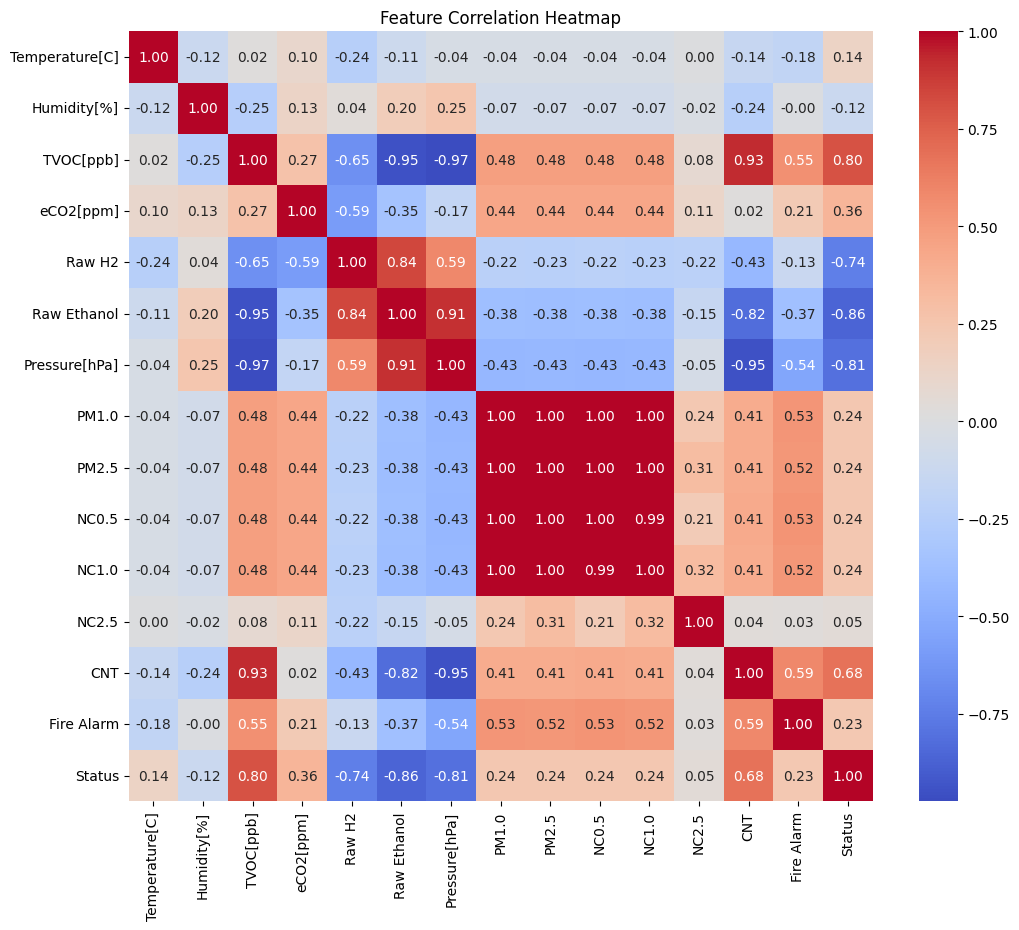

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [ ]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.9949041763598094


In [ ]:
print(confusion_matrix(y_test, y_pred_lr))

[[1825    0   31]
 [   2 1293    0]
 [  13    0 5863]]


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1856
           1       1.00      1.00      1.00      1295
           2       0.99      1.00      1.00      5876

    accuracy                           0.99      9027
   macro avg       1.00      0.99      0.99      9027
weighted avg       0.99      0.99      0.99      9027



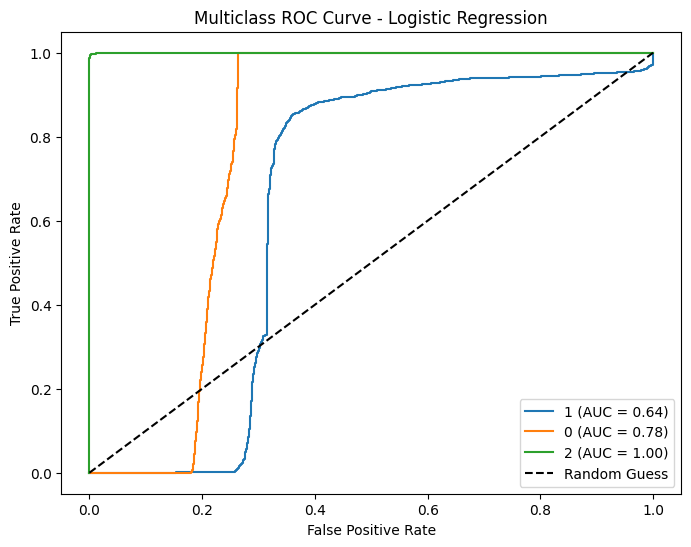

In [ ]:
classes = df['Status'].unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_score = log_reg.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cls} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [ ]:
feature_names = list(X.columns)
print(feature_names)

['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']


In [ ]:
new_data = {
    'Temperature[C]': [22.5, 67.0],
    'Humidity[%]': [45.0, 70.0],
    'TVOC[ppb]': [125, 4000],
    'eCO2[ppm]': [400, 1500],
    'Raw H2': [12500, 11000],
    'Raw Ethanol': [20000, 18500],
    'Pressure[hPa]': [939.0, 938.5],
    'PM1.0': [1.5, 30.0],
    'PM2.5': [2.0, 50.0],
    'NC0.5': [10.0, 200.0],
    'NC1.0': [2.5, 60.0],
    'NC2.5': [0.5, 10.0],
    'CNT': [1, 2]
}

In [ ]:
input_df = pd.DataFrame(new_data)
print(input_df)
input_scaled = scaler.transform(input_df)

   Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0            22.5         45.0        125        400   12500        20000   
1            67.0         70.0       4000       1500   11000        18500   

   Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  
0          939.0    1.5    2.0   10.0    2.5    0.5    1  
1          938.5   30.0   50.0  200.0   60.0   10.0    2  


In [ ]:
predictions = log_reg.predict(input_scaled)
label_predictions = label_encode.inverse_transform(predictions)
print(label_predictions)

['Safe' 'Warning']
